# Introduction to Dask graphs

In this notebook we see how to run functions concurrently using Dask graphs.

We are going to use a simple example: computing the square of two numbers and adding the results. A real use case would be, of course, when dealing with time-consuming functions. That could be expensive IO operations, for instance. We are going to simulate expensive IO operation by adding a `time.sleep(1)` to our functions.

On a regular python program (unless we use numpy arrays) we would do the following:
 - x1 = square of the first number
 - x2 = square of the second number
 - x = x1 + x2
 
Using Dask, we are going to transform that to
 - (x1 = square of the first number, x2 = square of the first number)  # computed at the same time!
 - x = x1 + x2

In [1]:
import dask
import time

In [2]:
def square(n):
    time.sleep(1)
    return n * n
    
def add(m, n):
    time.sleep(1)
    return m + n

In [3]:
%%time 

x = square(1)
y = square(2)
z = add(x, y)

CPU times: user 1.68 ms, sys: 66 µs, total: 1.74 ms
Wall time: 3 s


***

## Building a computational graph

In [4]:
x = dask.delayed(square)(1)
y = dask.delayed(square)(2)
z = dask.delayed(add)(x, y)

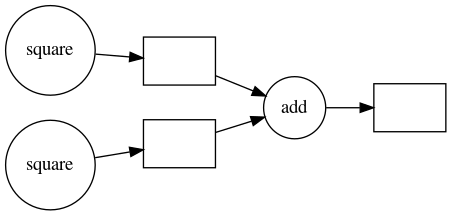

In [11]:
z.visualize(rankdir='LR')

In [6]:
%%time
z.compute()

CPU times: user 7.67 ms, sys: 3.88 ms, total: 11.5 ms
Wall time: 2.04 s


5

***

## Questions

<mark>Question 1</mark>: Rewrite the following cell so it's executed lazily.
 * Which functions should be `delayed`? `square`? `sum`? Both? Why?
 * Visualize the graph.
 * Compare the execution time with the sequential execution.

In [7]:
x = [square(i) for i in range(10)]
y = sum(x)

In [13]:
# %load solutions/exercise1.py
x = [dask.delayed(square)(i) for i in range(10)]
y = dask.delayed(sum)(x)

# use `y.visualize()` to visualize the graph and `y.compute()` to execute it.


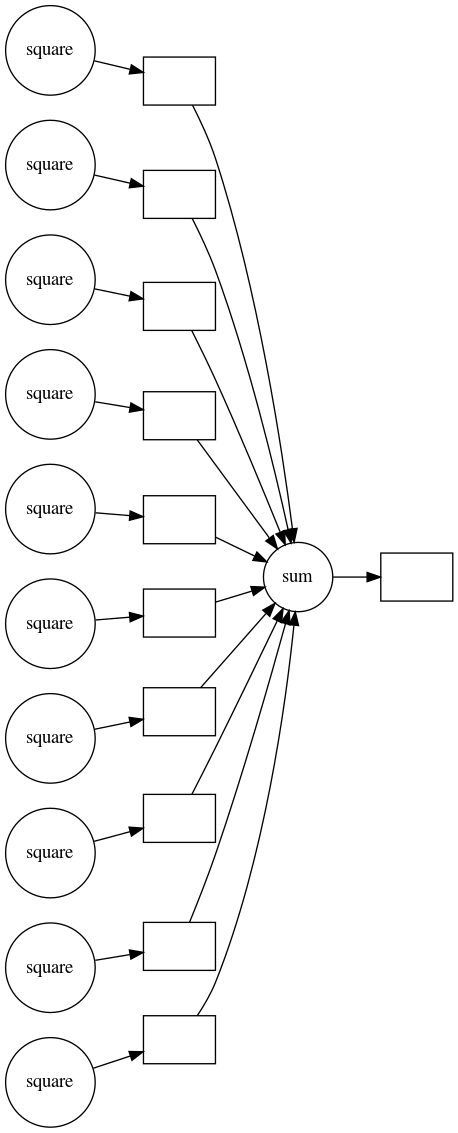

In [14]:
y.visualize(rankdir='LR')

In [15]:
%%time
y.compute()

CPU times: user 10.5 ms, sys: 156 µs, total: 10.7 ms
Wall time: 1.01 s


285

<mark>Question 2</mark>: Try a number of `square` calls larger and then shorter than the number of threads of the processor (24 for the gpu partition of Piz Daint). How much time it's going to take for 24 calls and how much for 25?

***
<mark>Question 3</mark>: Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed?
 * Visualize the graph.
 * Compare the execution time with the sequential execution.

In [ ]:
x = []
for i in range(10):
    x.append(square(i))

y = sum(x)

In [ ]:
%load solutions/exercise2.py

***
<mark>Question 4</mark> Rewrite the following cell so it's executed lazily.
 * Which functions should be delayed?
 * Visualize the graph.

In [ ]:
x = []
for i in range(10):
    if i % 2 == 0:
        x.append(square(i))
    else:
        x.append(add(i, i))

y = sum(x)

In [ ]:
%load solutions/exercise3.py